In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# Import loan dataset
data = pd.read_csv("loan_final313.csv")
df = pd.DataFrame(data)
display(df.head())
display(df.shape)

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


(887379, 30)

#  PCA1 (raw data)

In [3]:
# Choose 10 features
df1 = df.iloc[:,[8, 4, 21, 10, 12, 20, 6, 16, 18, 23]]
display(df1.shape)

# Construct X and y
X1 = df1.iloc[:,:-1]
display(X1.head())
y1 = df1.iloc[:,-1]
display(y1.head())

(887379, 10)

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat
0,24000,10.0,10.65,5000,1,0,1,1,1
1,30000,0.5,15.27,2500,2,1,1,2,2
2,12252,10.0,15.96,2400,1,0,1,3,2
3,49200,10.0,13.49,10000,1,0,1,4,2
4,80000,1.0,12.69,3000,2,0,1,4,1


0    2
1    3
2    3
3    3
4    2
Name: grade_cat, dtype: int64

In [4]:
# Create instances 
scaler = StandardScaler()
# Apply scaler
X1 = scaler.fit_transform(X1)
display(type(X1))
X1 = pd.DataFrame(X1)
display(type(X1))
display(X1.head())

numpy.ndarray

pandas.core.frame.DataFrame

,0,1,2,3,4,5,6,7,8
0,-0.788703,1.126029,-0.592611,-1.156460,-0.654724,-0.286767,-1.1633,-1.627203,-0.95239
1,-0.695964,-1.582528,0.461735,-1.452829,1.527360,3.487148,-1.1633,-1.207238,1.04999
2,-0.970285,1.126029,0.619202,-1.464683,-0.654724,-0.286767,-1.1633,-0.787274,1.04999
3,-0.399202,1.126029,0.055515,-0.563724,-0.654724,-0.286767,-1.1633,-0.367309,1.04999
4,0.076856,-1.439973,-0.127055,-1.393555,1.527360,-0.286767,-1.1633,-0.367309,-0.95239


In [5]:
# Create instances 
pca1 = PCA(n_components=2)
# Create a fitting model
pca1_model = pca1.fit(X1)
# Convert to a dataframe
X1_trans = pd.DataFrame(pca1_model.transform(X1), columns=['pca1', 'pca2'])
display(X1_trans.head())

,pca1,pca2
0,-1.801376,-0.729314
1,1.335095,-2.620087
2,0.036806,-1.803787
3,0.053096,-0.981897
4,-0.540469,-1.014896


Text(0.5, 1.0, 'PCA for raw dataset after scaling (y=grade)')

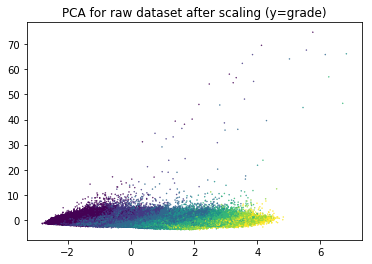

In [6]:
# PCA plot
plt.scatter(X1_trans['pca1'], X1_trans['pca2'], c=y1, s=0.2)
plt.title('PCA for raw dataset after scaling (y=grade)')

Text(0.5, 1.0, 'PCA for raw dataset after scaling (y=grade)')

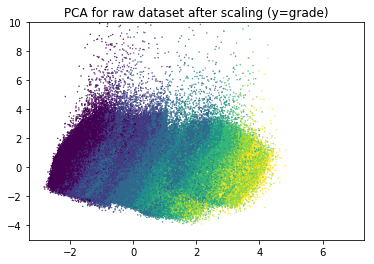

In [7]:
# PCA plot with "pca2" < 10
plt.scatter(X1_trans['pca1'], X1_trans['pca2'], c=y1, s=0.2)
plt.ylim(-5, 10)
plt.title('PCA for raw dataset after scaling (y=grade)')

In [8]:
# Principal axes in feature space, representing the directions of maximum variance in the data.
comp1 = pd.DataFrame(pca1_model.components_, columns=X1.columns)
display(comp1)

,0,1,2,3,4,5,6,7,8
0,0.042027,0.066386,0.581139,0.289323,0.465298,0.158597,0.047649,0.140967,0.555517
1,0.496820,0.306053,-0.224367,0.506857,0.196717,-0.169369,0.468188,-0.107072,-0.232828


* Based on the plot, although there are some overlaps, it is straightforward that the color becomes lighter from left to right, which means it is feasible to utilize typical classification models to analyse the dataset.

 # PCA2 (clean the feature "home ownership" )

In [9]:
# Exclude "other", "none", "any" from the home ownership category
df2 = df[df['home_ownership_cat']<4]
display(df2.shape)

(887144, 30)

In [10]:
# Select 10 main features
df2 = df2.iloc[:,[8, 4, 21, 10, 12, 20, 6, 16, 18, 23]]
display(df2.head())
display(df2.shape)

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat,grade_cat
0,24000,10.0,10.65,5000,1,0,1,1,1,2
1,30000,0.5,15.27,2500,2,1,1,2,2,3
2,12252,10.0,15.96,2400,1,0,1,3,2,3
3,49200,10.0,13.49,10000,1,0,1,4,2,3
4,80000,1.0,12.69,3000,2,0,1,4,1,2


(887144, 10)

In [11]:
# Construct X and y
X2 = df2.iloc[:,:-1]
display(X2.head())
y2 = df2.iloc[:,-1]
display(y2.head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat
0,24000,10.0,10.65,5000,1,0,1,1,1
1,30000,0.5,15.27,2500,2,1,1,2,2
2,12252,10.0,15.96,2400,1,0,1,3,2
3,49200,10.0,13.49,10000,1,0,1,4,2
4,80000,1.0,12.69,3000,2,0,1,4,1


0    2
1    3
2    3
3    3
4    2
Name: grade_cat, dtype: int64

In [12]:
# Create instances 
scaler = StandardScaler()
# Apply scaler
X2 = scaler.fit_transform(X2)
display(type(X2))
X2 = pd.DataFrame(X2)
display(type(X2))
display(X2.head())

numpy.ndarray

pandas.core.frame.DataFrame

,0,1,2,3,4,5,6,7,8
0,-0.788695,1.125973,-0.592560,-1.156541,-0.654822,-0.286703,-1.163372,-1.627381,-0.952365
1,-0.695962,-1.582664,0.461743,-1.452904,1.527133,3.487936,-1.163372,-1.207380,1.050017
2,-0.970267,1.125973,0.619204,-1.464758,-0.654822,-0.286703,-1.163372,-0.787379,1.050017
3,-0.399216,1.125973,0.055540,-0.563815,-0.654822,-0.286703,-1.163372,-0.367379,1.050017
4,0.076815,-1.440104,-0.127024,-1.393631,1.527133,-0.286703,-1.163372,-0.367379,-0.952365


In [13]:
# Create instances 
pca2 = PCA(n_components=2)
# Create a fitting model
pca2_model = pca2.fit(X2)
# Convert to a dataframe
X2_trans = pd.DataFrame(pca2_model.transform(X2), columns=['pca1', 'pca2'])
display(X2_trans.head())

,pca1,pca2
0,-1.801658,-0.729767
1,1.335036,-2.620769
2,0.036555,-1.804002
3,0.052869,-0.982346
4,-0.540674,-1.015527


Text(0.5, 1.0, 'PCA for clean dataset after scaling (y=grade)')

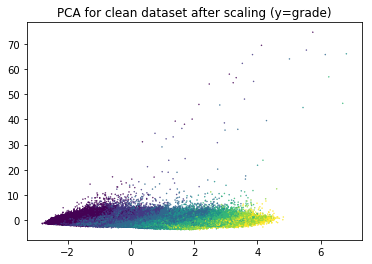

In [14]:
# PCA plot
plt.scatter(X2_trans['pca1'], X2_trans['pca2'], c=y2, s=0.2)
plt.title('PCA for clean dataset after scaling (y=grade)')

Text(0.5, 1.0, 'PCA for clean dataset after scaling (y=grade)')

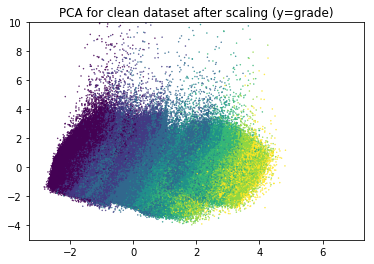

In [15]:
# PCA plot when pca2 < 10
plt.scatter(X2_trans['pca1'], X2_trans['pca2'], c=y2, s=0.2)
plt.ylim(-5, 10)
plt.title('PCA for clean dataset after scaling (y=grade)')

* The plot of PCA is similar to that in the raw dataset case, which means the outliners in feature "home ownership" explains little variability of the raw dataset.

# PCA3 (clean the feature "employment length"  )

In [16]:
# Round 6.05 to 6 in employment length (years)
df3 = df
df3[df3['emp_length_int']==6.05]=6
display(df3.shape)
display(df3[df3['emp_length_int']==6.05].shape)

(887379, 30)

(0, 30)

In [17]:
# Select 10 main features
df3 = df3.iloc[:,[8, 4, 21, 10, 12, 20, 6, 16, 18, 23]]
display(df3.head())
display(df3.shape)

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat,grade_cat
0,24000,10.0,10.65,5000,1,0,1,1,1,2
1,30000,0.5,15.27,2500,2,1,1,2,2,3
2,12252,10.0,15.96,2400,1,0,1,3,2,3
3,49200,10.0,13.49,10000,1,0,1,4,2,3
4,80000,1.0,12.69,3000,2,0,1,4,1,2


(887379, 10)

In [18]:
# Construct X and y
X3 = df3.iloc[:,:-1]
display(X3.head())
y3 = df3.iloc[:,-1]
display(y3.head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat
0,24000,10.0,10.65,5000,1,0,1,1,1
1,30000,0.5,15.27,2500,2,1,1,2,2
2,12252,10.0,15.96,2400,1,0,1,3,2
3,49200,10.0,13.49,10000,1,0,1,4,2
4,80000,1.0,12.69,3000,2,0,1,4,1


0    2
1    3
2    3
3    3
4    2
Name: grade_cat, dtype: int64

In [19]:
# Create instances 
scaler = StandardScaler()
# Apply scaler
X3 = scaler.fit_transform(X3)
display(type(X3))
X3 = pd.DataFrame(X3)
display(type(X3))
display(X3.head())

numpy.ndarray

pandas.core.frame.DataFrame

,0,1,2,3,4,5,6,7,8
0,-0.733548,1.126743,-0.488995,-1.034195,-0.483915,-0.283409,-1.029607,-1.689162,-0.637423
1,-0.642794,-1.581800,0.524463,-1.316434,0.407507,0.472571,-1.029607,-1.259830,0.268387
2,-0.911245,1.126743,0.675823,-1.327723,-0.483915,-0.283409,-1.029607,-0.830499,0.268387
3,-0.352380,1.126743,0.133997,-0.469719,-0.483915,-0.283409,-1.029607,-0.401168,0.268387
4,0.113493,-1.439245,-0.041494,-1.259986,0.407507,-0.283409,-1.029607,-0.401168,-0.637423


In [20]:
# Create instances 
pca3 = PCA(n_components=2)
# Create a fitting model
pca3_model = pca3.fit(X3)
# Convert to a dataframe
X3_trans = pd.DataFrame(pca3_model.transform(X3), columns=['pca1', 'pca2'])
display(X3_trans.head())

,pca1,pca2
0,0.791878,-1.272278
1,-0.356292,-1.992995
2,0.359986,-1.060501
3,0.533007,-0.330879
4,0.453613,-1.650035


Text(0.5, 1.0, 'PCA for clean dataset (6.05 to 6) after scaling (y=grade)')

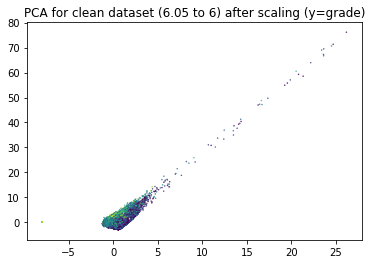

In [21]:
# PCA plot
plt.scatter(X3_trans['pca1'], X3_trans['pca2'], c=y3, s=0.2)
plt.title('PCA for clean dataset (6.05 to 6) after scaling (y=grade)')

Text(0.5, 1.0, 'PCA for clean dataset (6.05 to 6) after scaling (y=grade)')

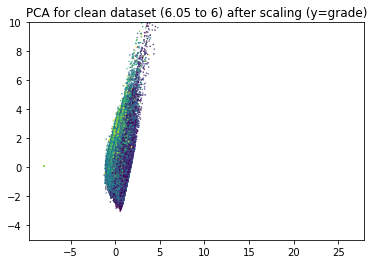

In [22]:
# PCA plot with "pca2" < 10
plt.scatter(X3_trans['pca1'], X3_trans['pca2'], c=y3, s=0.2)
plt.ylim(-5, 10)
plt.title('PCA for clean dataset (6.05 to 6) after scaling (y=grade)')

* In this case, the plot of PCA is way different from that in the raw dataset case, which means the outliners in feature "employment length" explains a portion of variability of the raw dataset.
* Since the outliners in the former feature take up less than 1% in the total dataset, there is no need to conduct data cleansing before PCA, in other words, the result in the first case will be ulitized.